<a href="https://colab.research.google.com/github/Tommmster/AnalisisYCuracion/blob/master/EyCD_Entregable_Parte_2_Ejercicio_1_g20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

**Edición 2022**

---
## **Trabajo práctico entregable - Parte 2**
---

## **Grupo 20**

**Integrantes:** Fanny Ruales, Gastón Briozzo, Tomás Niño Kehoe

**Profesor de Práctico:** Alejandro García


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn
seaborn.set_context('talk')

In [ ]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pd.read_csv(
    'melb_data_extended.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


### 1.1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto BuildingArea y YearBuilt, que volveremos a imputar más adelante.

In [ ]:
#df = melb_df
df = melb_df.drop(['BuildingArea', 'YearBuilt'], axis=1, inplace=False)
print(df.columns)
df[:3]

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean'],
      dtype='object')


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258


### 1.2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

In [ ]:
c_all = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean']

c_cat = ['Suburb','Address',  'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'Regionname', 'zipcode']
c_num = ['Rooms', 'Price', 'Distance', 'Bedroom2', 
         'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 
         'Propertycount', 'airbnb_price_mean', 'airbnb_record_count',
         'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean']

In [ ]:
df[c_cat].nunique()

Suburb           314
Address        13378
Type               3
Method             5
SellerG          268
Date              58
Postcode         198
CouncilArea       33
Regionname         8
zipcode          191
dtype: int64

In [ ]:
# Check for nulls
df[c_cat].isna().sum()

Suburb            0
Address           0
Type              0
Method            0
SellerG           0
Date              0
Postcode          0
CouncilArea    1369
Regionname        0
zipcode          20
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder_sub = OneHotEncoder(sparse=False)
encoder_sub.fit(df[['Suburb']])
#print('Suburb')
#print(encoder_sub.categories_)
#print()

encoder_typ = OneHotEncoder(sparse=False)
encoder_typ.fit(df[['Type']])
#print('Type')
#print(encoder_typ.categories_)
#print()

encoder_met = OneHotEncoder(sparse=False)
encoder_met.fit(df[['Method']])
#print('Method')
#print(encoder_met.categories_)
#print()

encoder_sel = OneHotEncoder(sparse=False)
encoder_sel.fit(df[['SellerG']])
#print('SellerG')
#print(encoder_sel.categories_)
#print()

encoder_dat = OneHotEncoder(sparse=False)
encoder_dat.fit(df[['Date']])
#print('Date')
#print(encoder_dat.categories_)
#print()

encoder_cou = OneHotEncoder(sparse=False)
encoder_cou.fit(df[['CouncilArea']])
#print('CouncilArea')
#print(encoder_cou.categories_)
#print()

encoder_reg = OneHotEncoder(sparse=False)
encoder_reg.fit(df[['Regionname']])
#print('Regionname')
#print(encoder_reg.categories_)
#print()

OneHotEncoder(sparse=False)

In [ ]:
et_sub = encoder_sub.transform(df[['Suburb']])
et_typ = encoder_typ.transform(df[['Type']])
et_met = encoder_met.transform(df[['Method']])
et_sel = encoder_sel.transform(df[['SellerG']])
et_dat = encoder_dat.transform(df[['Date']])
et_cou = encoder_cou.transform(df[['CouncilArea']])
et_reg = encoder_reg.transform(df[['Regionname']])

et_sub[:5]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#c_cat = ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
#c_num = ['Address', 'Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 
#         'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 
#         'Propertycount', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
#         'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean']

categorical_cols = ['Type', 'Regionname','Suburb']
numerical_cols = ['Rooms', 'Bathroom']
melb_df_categoricas=df[categorical_cols]
melb_df_numericas=df[numerical_cols]

feature_cols = ['Type','Regionname','Suburb']
TypeList=melb_df_categoricas['Type'].unique()
RegionnameList=melb_df_categoricas['Regionname'].unique()
SuburbList=melb_df_categoricas['Suburb'].unique()

x = melb_df_categoricas.values  # genera un numpy.ndarray
enc = preprocessing.OneHotEncoder(categories=[TypeList, RegionnameList, SuburbList])
enc.fit(x)
encoded_categoricas = enc.transform(melb_df_categoricas).toarray()

encoded_categoricas[:3]
enc.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_h', 'x0_u', 'x0_t', 'x1_Northern Metropolitan',
       'x1_Western Metropolitan', 'x1_Southern Metropolitan',
       'x1_Eastern Metropolitan', 'x1_South-Eastern Metropolitan',
       'x1_Eastern Victoria', 'x1_Northern Victoria',
       'x1_Western Victoria', 'x2_Abbotsford', 'x2_Airport West',
       'x2_Albert Park', 'x2_Alphington', 'x2_Altona', 'x2_Altona North',
       'x2_Armadale', 'x2_Ascot Vale', 'x2_Ashburton', 'x2_Ashwood',
       'x2_Avondale Heights', 'x2_Balaclava', 'x2_Balwyn',
       'x2_Balwyn North', 'x2_Bentleigh', 'x2_Bentleigh East',
       'x2_Box Hill', 'x2_Braybrook', 'x2_Brighton', 'x2_Brighton East',
       'x2_Brunswick', 'x2_Brunswick West', 'x2_Bulleen', 'x2_Burwood',
       'x2_Camberwell', 'x2_Canterbury', 'x2_Carlton North',
       'x2_Carnegie', 'x2_Caulfield', 'x2_Caulfield North',
       'x2_Caulfield South', 'x2_Chadstone', 'x2_Clifton Hill',
       'x2_Coburg', 'x2_Coburg North', 'x2_Collingwood', 'x2_Doncaster',
       'x2_Eaglemont', '

**VERSION FINAL**

In [ ]:
df_cat = df[c_cat]
df_num = df[c_num]

df_cat['Postcode'] = df_cat['Postcode'].apply(str)
df_cat['zipcode']  = df_cat['zipcode'].apply(str)

categorias = [df_cat[col].value_counts().index.values for col in c_cat]

encoder = OneHotEncoder(categories=categorias, handle_unknown="ignore")
encoder.fit(df_cat)

et = encoder.transform(df_cat).toarray()#.todense()
dat_enc = np.hstack([et, df_num])
dat_enc.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(13580, 14471)

En dat_enc estan todos los datos categoricos ya codificados, unidos con los datos numéricos del dataframe original. La única observación es que los datos están en formato matriz, no en un dataframe.

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

ValueError: ignored

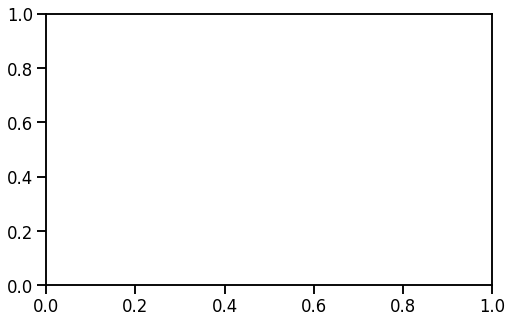

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


```
  # 1. Encoding
  ## 1.1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto BuildingArea y YearBuilt, que volveremos a imputar más adelante.
  1. Se generó un dataframe con los datos obtenidos anteriormente.
  2. Se eliminaron las columas BuildingArea y YearBuilt con la función drop(). Estas columnas serán imputadas más adelante.
  ## 1.2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.
  1. Se generó una lista con las variables categóricas del dataframe c_cat = ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'].  
  2. Para cada columna categóricas se codificaron sus datos con el método OneHotEncoding.
  3. Los valores codificados fueron transformados a arreglos correspondientes a cada columna.
  

```